# MTH3302 - Méthodes probabilistes et statistiques pour I.A.
#### Polytechnique Montréal
### Projet A2024
----
Équipe T - TODO
### Objectif
Prédiction de **la consommation en carburant de voitures récentes**.

### Données
Le jeu de données contient pour presque 400 véhicule, la consommation moyenne en L/100km, l'année de frabrication, le type de véhicule, le nombre de cylindre, cylindree, la transmission et la boite.

- `train.csv` est l'ensemble d'entraînement
- `test.csv` est l'ensemble de test


## Chargement des données

Importation des librairies utilisées dans le calepin.

// TODO: à enlever à la fin:

Pour importer librairies:
using Pkg
Pkg.add(["CSV", "DataFrames", "Combinatorics", "Gadfly", "Distributions"], ...)

In [ ]:
using CSV, DataFrames, Statistics, Dates, Gadfly, LinearAlgebra, DecisionTree, Plots

In [31]:
function standardize(data)
    return (data .- mean(data)) ./ std(data)
end

function standardize_data(data)
    stddata = deepcopy(data)
   for col in names(stddata)
        if eltype(stddata[!, col]) <: Number
            stddata[!, col] = standardize(stddata[!, col])
        end
    end
    return stddata
end

standardize_data (generic function with 1 method)

In [32]:
function encode(data, column)
    for c in unique(data[!, column])
        data[!, Symbol(c)] = ifelse.(data[!, column] .== c, 1, 0)
    end
    return data
end

function encode_data(data)
    encoded_data = deepcopy(data)
    encoded_data = encode(encoded_data, :type)
    encoded_data = encode(encoded_data, :transmission)
    encoded_data = encode(encoded_data, :boite)
    return select!(encoded_data, Not([:type, :transmission, :boite, :cylindree, :nombre_cylindres]))
end

encode_data (generic function with 1 method)

In [33]:
function getStandardEncodedData(data)
    data_copy = deepcopy(data)
    standardised_data = standardize_data(data_copy)
    standardised_data = encode_data(standardised_data,)
    return standardised_data
end




getStandardEncodedData (generic function with 1 method)

In [34]:
function rmse(y, ychap)
    return sqrt(mean((ychap .- y).^2))
end


rmse (generic function with 1 method)

In [35]:
function rsquared(y, ychap)
    ss_total = sum((y .- mean(y)).^2)
    ss_res = sum((y .- ychap).^2)
    return ss_res / ss_total
end


rsquared (generic function with 1 method)

In [80]:
function split_data(data,k)
    n = size(data, 1)
    validation_size = floor(Int, n * k)

    validation_indices = rand(1:n, validation_size)  
    
    validation_data = data[validation_indices, :]
    training_data = data[setdiff(1:n, validation_indices), :]
    
    return training_data, validation_data
end

split_data (generic function with 1 method)

In [81]:
function regression(standardised_data, trainTestSplitPercentage)
    training_data, test_data = split_data(standardised_data, trainTestSplitPercentage)
    X_train =  Matrix(training_data[:, Not(:consommation)])
    y_train = training_data[:, :consommation]

    X_test = Matrix(test_data[:, Not(:consommation)])
    y_test = test_data[:, :consommation]

    beta = X_train \ y_train

    ychap =  X_test * beta
    ychap = (ychap .* std(standardised_data[:, :consommation])) .+ mean(standardised_data[:, :consommation])
    y_test = (y_test .* std(standardised_data[:, :consommation])) .+ mean(standardised_data[:, :consommation])
    # print("regression\n")
    # print("r2 = ", rsquared(y_test, ychap), "\n")
    rmseval = rmse(y_test, ychap)
    # print("rmse = ", rmseval , "\n\n")
    return rmseval
end


regression (generic function with 1 method)

In [95]:
function decisionTree(standardised_data, trainTestSplitPercentage, max_depth)
    training_data, test_data = split_data(standardised_data, trainTestSplitPercentage)
    X_train =  Matrix(training_data[:, Not(:consommation)])
    y_train = training_data[:, :consommation]

    X_test = Matrix(test_data[:, Not(:consommation)])
    y_test = test_data[:, :consommation]


    model = DecisionTreeRegressor(max_depth=max_depth)
    fit!(model, X_train, y_train)


    ychap =  predict(model, X_test)
    ychap = (ychap .* std(trainData[:, :consommation])) .+ mean(trainData[:, :consommation])


    y_test = (y_test .* std(trainData[:, :consommation])) .+ mean(trainData[:, :consommation])

    rmseval = rmse(y_test, ychap)

    return rmseval
end


decisionTree (generic function with 2 methods)

In [165]:
function decisionTree_remise(X_train ,y_train,  X_test, max_depth)
    
    #X_test = Matrix(test_data[:, Not(:consommation)])
    #y_test = test_data[:, :consommation]


    model = DecisionTreeRegressor(max_depth=max_depth)
    fit!(model, X_train, y_train) #peut etre normaliser sur tout les données, pas justr sur les données d'entrainement

  
    ychap =  predict(model, X_test)  
    #= ychap = (ychap .* std(trainData[:, :consommation])) .+ mean(trainData[:,    :consommation]) =#




    #= y_test = (y_test .* std(trainData[:, :consommation])) .+ mean(trainData[:, :consommation])

    rmseval = rmse(y_test, ychap) =#

    return ychap
end

decisionTree_remise (generic function with 2 methods)

In [161]:
X_train =  Matrix(trainData[:, Not(:consommation)])
y_train = trainData.consommation
X_test = Matrix(testData)


150×7 Matrix{Any}:
 2014  "voiture_moyenne"        …  "manuelle"     10.0
 2014  "voiture_moyenne"           "automatique"  10.0
 2014  "VUS_petit"                 "automatique"  10.0
 2014  "VUS_petit"                 "automatique"   8.0
 2014  "voiture_sous_compacte"     "manuelle"     46.4
 2014  "voiture_sous_compacte"  …  "automatique"  40.0
 2014  "voiture_sous_compacte"     "manuelle"     40.0
 2014  "VUS_petit"                 "automatique"   9.6
 2014  "VUS_petit"                 "automatique"  21.0
 2014  "voiture_deux_places"       "manuelle"     52.0
 2014  "voiture_deux_places"    …  "manuelle"     52.0
 2014  "voiture_sous_compacte"     "automatique"  70.8
 2014  "VUS_petit"                 "automatique"   8.0
    ⋮                                     ⋱  ⋮                        
 2023  "VUS_petit"                 "automatique"   6.4
 2023  "voiture_moyenne"           "automatique"  19.8
 2024  "voiture_deux_places"    …  "automatique"  40.0
 2024  "VUS_petit"            

In [166]:
res = decisionTree_remise(X_train ,y_train,  X_test, 5)

150-element Vector{Float64}:
  8.773101155974718
  8.070047540540804
  9.545548529167164
  9.889100280579937
 14.68297719087637
 14.68297719087637
 14.68297719087637
  9.889100280579937
 10.924893508841617
 15.345064163165286
 15.345064163165286
 15.345064163165286
  8.840702060295865
  ⋮
  7.842333308965197
 11.632846725905672
 12.897491767520394
 10.686605970839569
  8.840702060295865
  7.842333308965197
  8.070047540540804
  8.845504273504272
 12.121046960836416
 10.620542993264342
  7.644047072551107
  8.070047540540804

In [ ]:
function ridge_regression(standardised_data, lambda, trainTestSplitPercentage)
    training_data, test_data = split_data(standardised_data, trainTestSplitPercentage)
    X_train =  Matrix(training_data[:, Not(:consommation)])
    y_train = training_data[:, :consommation]

    X_test = Matrix(test_data[:, Not(:consommation)])
    y_test = test_data[:, :consommation]


    beta = (X_train'X_train + lambda*I)\X_train'y_train

    ychap =  X_test * beta
    ychap = (ychap .* std(standardised_data[:, :consommation])) .+ mean(standardised_data[:, :consommation])
    y_test = (y_test .* std(standardised_data[:, :consommation])) .+ mean(standardised_data[:, :consommation])

    rmseval = rmse(y_test, ychap)
    # print("rmse = ", rmseval , "\n\n")
    return rmseval
end

ridge_regression (generic function with 1 method)

In [157]:
trainData = CSV.read("./data/train.csv", DataFrame)
testData = CSV.read("./data/test.csv", DataFrame)
first(trainData, 1)

Row,annee,type,nombre_cylindres,cylindree,transmission,boite,consommation
,Int64,String31,Int64,String3,String15,String15,String31
1,2023,voiture_moyenne,8,"4,4",integrale,automatique,"13,8358823529412"


In [158]:
trainData.consommation = parse.(Float64,replace.(trainData.consommation, "," => "."))
trainData.cylindree = parse.(Float64,replace.(trainData.cylindree, "," => ".")) 

testData.cylindree = parse.(Float64,replace.(testData.cylindree, "," => "."))


150-element Vector{Float64}:
 2.5
 2.5
 2.5
 2.0
 5.8
 5.0
 5.0
 2.4
 3.5
 5.2
 5.2
 5.9
 2.0
 ⋮
 1.6
 3.3
 5.0
 2.0
 2.0
 1.6
 2.0
 2.0
 3.0
 3.0
 1.5
 2.0

In [159]:
trainData[!,:volume_gaz] = trainData[!,:nombre_cylindres] .* trainData[!,:cylindree]

testData[!,:volume_gaz] = testData[!,:nombre_cylindres] .* testData[!,:cylindree]
first(testData, 1)


Row,annee,type,nombre_cylindres,cylindree,transmission,boite,volume_gaz
,Int64,String31,Int64,Float64,String15,String15,Float64
1,2014,voiture_moyenne,4,2.5,traction,manuelle,10.0


In [94]:
data = getStandardEncodedData(trainData)
n = 0
for i in range(0, 1, length=100)
    n += regression(data, 0.05)
end
print("average rmse for regression: ", n/100, "\n")

n = 0
for i in range(0, 1, length=100)
    n += decisionTree(data, 0.05, 5)
end
print("average rmse for decision Tree: ", n/100, "\n")


n = 0
for i in range(0, 1, length=100)
    n += random_forest(data, 0.05, 5)
end
print("average rmse for decision Tree: ", n/100, "\n")

n = 0
for i in range(0, 1, length=100)
    n += ridge_regression(data, 10, 0.05)
end
print("average rmse for ridge: ", n/100, "\n")



average rmse for regression: 0.4597267973399245
average rmse for decision Tree: 0.9123552342134156
average rmse for decision Tree: 1.0143222213471978
average rmse for ridge: 0.4516542934418684


In [139]:
res = decisionTree_remise(trainData, Matrix(testData), 5)

X_test = Any[2014 String31("voiture_moyenne") 4 2.5 String15("traction") String15("manuelle") 10.0 29.129158930900854; 2014 String31("voiture_moyenne") 4 2.5 String15("traction") String15("automatique") 10.0 27.624790755138374; 2014 String31("VUS_petit") 4 2.5 String15("traction") String15("automatique") 10.0 30.782013308109118; 2014 String31("VUS_petit") 4 2.0 String15("4x4") String15("automatique") 8.0 31.517132664879455; 2014 String31("voiture_sous_compacte") 8 5.8 String15("propulsion") String15("manuelle") 46.4 41.77489352984782; 2014 String31("voiture_sous_compacte") 8 5.0 String15("propulsion") String15("automatique") 40.0 41.77489352984782; 2014 String31("voiture_sous_compacte") 8 5.0 String15("propulsion") String15("manuelle") 40.0 41.77489352984782; 2014 String31("VUS_petit") 4 2.4 String15("4x4") String15("automatique") 9.6 31.517132664879455; 2014 String31("VUS_petit") 6 3.5 String15("integrale") String15("automatique") 21.0 33.73348478235694; 2014 String31("voiture_deux_pl

150-element Vector{Float64}:
 29.129158930900854
 27.624790755138374
 30.782013308109118
 31.517132664879455
 41.77489352984783
 41.77489352984783
 41.77489352984783
 31.517132664879455
 33.73348478235694
 43.191602794736035
 43.191602794736035
 43.191602794736035
 29.273808850737666
  ⋮
 27.137536247615326
 35.24833694483749
 37.954377725335874
 33.22360590401587
 29.273808850737666
 27.137536247615326
 27.624790755138374
 29.28408444930563
 36.29296978749245
 33.082246783063276
 26.713250677916673
 27.624790755138374

In [118]:
#= trainData.consommation = res =#
testData.consommation = res

150-element Vector{Float64}:
 29.129158930900854
 27.624790755138374
 30.782013308109118
 31.517132664879455
 41.77489352984782
 41.77489352984782
 41.77489352984782
 31.517132664879455
 33.73348478235694
 43.191602794736035
 43.191602794736035
 43.191602794736035
 29.273808850737673
  ⋮
 27.137536247615326
 35.24833694483749
 37.954377725335874
 33.22360590401587
 29.273808850737673
 27.137536247615326
 27.624790755138374
 29.28408444930563
 36.29296978749245
 33.082246783063276
 26.713250677916673
 27.624790755138374

In [167]:
testData.consommation = res

150-element Vector{Float64}:
  8.773101155974718
  8.070047540540804
  9.545548529167164
  9.889100280579937
 14.68297719087637
 14.68297719087637
 14.68297719087637
  9.889100280579937
 10.924893508841617
 15.345064163165286
 15.345064163165286
 15.345064163165286
  8.840702060295865
  ⋮
  7.842333308965197
 11.632846725905672
 12.897491767520394
 10.686605970839569
  8.840702060295865
  7.842333308965197
  8.070047540540804
  8.845504273504272
 12.121046960836416
 10.620542993264342
  7.644047072551107
  8.070047540540804

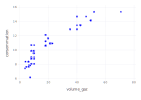

In [168]:
#= plot(testData, x=:volume_gaz, y=:consommation, Geom.point, Theme(default_color="blue")) =#

plot(testData, x=:volume_gaz, y=:consommation, Geom.point, Theme(default_color="blue"))
#= plot(trainData, x=:volume_gaz, y=:consommation, Geom.point, Theme(default_color="red")) =#

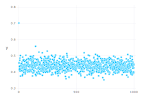

In [70]:
#search for the best lambda
rmses = []
for lambda in range(1, 1000, length=1000)
        m = 0
        for i in range(1, 10, length=10)
            m += decisionTree(data, 0.05, lambda)
        end
        push!(rmses, m/10)
end
plot(y=rmses)


In [70]:
for type in unique(trainData.type)
    println(type)
    data_type = trainData[trainData.type .== type, :]
    println(combine(groupby(data_type, :transmission), :consommation => mean, :volume_gaz => mean, nrow => :nrow))
    println()
end

voiture_moyenne
3×4 DataFrame
 Row │ transmission  consommation_mean  volume_gaz_mean  nrow  
     │ String15      Float64            Float64          Int64 
─────┼─────────────────────────────────────────────────────────
   1 │ integrale              10.7516          20.9773      22
   2 │ propulsion             11.2341          22.04         5
   3 │ traction                7.67265          9.59091     11

VUS_petit
3×4 DataFrame
 Row │ transmission  consommation_mean  volume_gaz_mean  nrow  
     │ String15      Float64            Float64          Int64 
─────┼─────────────────────────────────────────────────────────
   1 │ integrale              10.1752           11.202      50
   2 │ traction                9.45358          10.5959     49
   3 │ 4x4                     9.93476          12.2364     11

voiture_compacte
3×4 DataFrame
 Row │ transmission  consommation_mean  volume_gaz_mean  nrow  
     │ String15      Float64            Float64          Int64 
─────┼─────────────────

In [ ]:
for type in unique(trainData.type)
    println(type)
    data_type = trainData[trainData.type .== type, :]
    display(plot(x=data_type.volume_gaz, y=data_type.consommation))
    println()
end

## Exploration des données

In [170]:
id = 1:150

df_pred = DataFrame(id=id, consommation=res)

CSV.write("benchmark1.csv", df_pred)

"benchmark1.csv"